## Example for class imbalance

The dataset used in this notebook is of '[IEEE-CIS Fraud Detection](https://www.kaggle.com/c/ieee-fraud-detection/data)'. This notebook will introduce you to class imbalance problem.

Data set link: [Fraud Dataset](https://drive.google.com/file/d/1q8SYcjOJULdSkETv5S_gd7xNq1GrBHAO/view)

The dataset can be directly accessed with the link: https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv 

#### Imbalanced Problem
Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

E:\Softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# importing the fraud dataset
fraud_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [3]:
# take a look at the data
fraud_data.shape
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,...,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,...,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


E:\Softwares\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


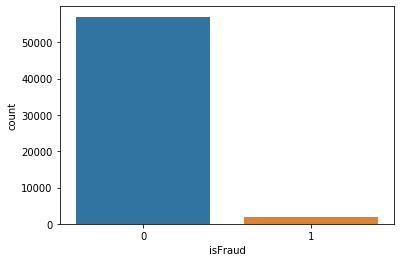

In [4]:
# Taking a look at the target variable
# isFraud = 0 --> normal transaction
# isFraud = 1 --> fraudulent transaction
fraud_data.isFraud.value_counts()
fraud_data.isFraud.value_counts(normalize=True) * 100

# visualize the target variable column
sns.countplot(fraud_data.isFraud)

# interpreting the results - 3.40% of transactions are fraudulent and 99.60% of transactions are normal

In [45]:
# Missing values - To get percentage of missing data in each column
fraud_data.isnull().sum() / len(fraud_data) * 100   

# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns 
# filling missing values of numerical columns with mean value
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean

# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0]) 

In [6]:
# Let's have a look if there still exist any missing values
fraud_data.isnull().sum() / len(fraud_data) * 100

TransactionID     0.0
isFraud           0.0
TransactionDT     0.0
TransactionAmt    0.0
ProductCD         0.0
                 ... 
id_36             0.0
id_37             0.0
id_38             0.0
DeviceType        0.0
DeviceInfo        0.0
Length: 434, dtype: float64

## One hot encoding

Machine learning models require all input and output variables to be numeric. Run the model with data as-is and then iterate for feature engineering. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.

Ordinal encoding - The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst. In this case, a one-hot encoding can be applied to the ordinal representation. 


The one-hot encoding creates one binary variable for each category. The problem is that this representation includes redundancy. For example, if we know that [1, 0, 0] represents “blue” and [0, 1, 0] represents “green” we don’t need another binary variable to represent “red“, instead we could use 0 values for both “blue” and “green” alone, e.g.. [0, 0].

This is called a dummy variable encoding, and always represents C categories with C-1 binary variables. In addition to being slightly less redundant, a dummy variable representation is required for some models.

For example, in the case of a linear regression model (and other regression models that have a bias term), a one hot encoding will case the matrix of input data to become singular, meaning it cannot be inverted and the linear regression coefficients cannot be calculated using linear algebra. For these types of models a dummy variable encoding must be used instead.

In [7]:
# earlier we have collected all the categorical columns in cat_cols
fraud_data.shape
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])
fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,...,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,...,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,...,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
new_df = fraud_data.drop(['DeviceInfo_rv:54.0'], axis=1)

In [72]:
# new_df['DeviceInfo_rv:54.0']

## Feature transformation

In most cases, the numerical features of the dataset do not have a certain range and they differ from each other. In real life, it is nonsense to expect age and income columns to have the same range. But from the machine learning point of view, how these two columns can be compared?
Scaling solves this problem.

The continuous features become identical in terms of the range, after a scaling process. This process is not mandatory for many algorithms, but it might be still nice to apply. However, the algorithms based on distance calculations such as k-NN or k-Means need to have scaled continuous features as model input.

*Normalization (or min-max normalization)* scale all values in a fixed range between 0 and 1. This transformation does not change the distribution of the feature and due to the decreased standard deviations, the effects of the outliers increases. Therefore, before normalization, it is recommended to handle the outliers.

*Standardization (or z-score normalization)* scales the values while taking into account standard deviation. If the standard deviation of features is different, their range also would differ from each other. This reduces the effect of the outliers in the features.

In [8]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
Y = fraud_data.isFraud      

In [9]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

# Let's see how the data looks after scaling
scaled_features.head()

E:\Softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,...,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-4.551081e-01,...,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115


## Splitting the data

##### Split into train and validation set
Train – what we use to train the model

Validation – what we use to evaluate the model

Test – data that is unexposed to the model 

In [46]:
fraud_data.isFraud.value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42, stratify=Y)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

E:\Softwares\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Dealing with imbalanced data

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed ( let us look only at binary classification)

Imbalance can occur due to:
- Biased sampling – E.g., Sampling only from a single geographic location
- Nature of the problem statement – E.g., any fraudulent transactions like credit card frauds, etc.

The imbalance could be
- Slight Imbalance (gender distribution – 60% male; 40% female)
- Severe Imbalance (claims prediction in insurance)
- Terms (Minority class - that has few examples; Majority class - that has many examples)

### Over sampling minority class

Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.

In [11]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fraud = train_data[train_data.isFraud==0]
fraud = train_data[train_data.isFraud==1]

In [12]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
fraud_upsampled = resample(fraud,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fraud), # Match number in majority class
                           random_state=27)

In [13]:
# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

In [14]:
# Now let's check the classes count
upsampled.isFraud.value_counts()

# We can notice here after resampling we have an equal ratio of data points for each class!

1    39942
0    39942
Name: isFraud, dtype: int64

### Under sampling majority class
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.

In [15]:
# we are still using our separated class i.e. fraud and not_fraud from above
# Again we are removing the observations of the majority class to mathch the number of minority class
# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27)

In [16]:
# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])    # Concatenation

In [17]:
# let's check the classes counts
downsampled.isFraud.value_counts()

# we have an equal ratio of fraud to not fraud data points, but in this case 
# a much smaller quantity of data to train the model on.

1    1395
0    1395
Name: isFraud, dtype: int64

### SMOTE - Synthetic Minority Oversampling Technique

Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors' algorithm to generate new and synthetic data we can use for training our model.

In [18]:
# !pip install delayed



Having trouble with SMOTE installation
 -> Download using `conda install -c conda-forge imbalanced-learn`

In [31]:
# import SMOTE 
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
# random_state = 25, sampling_strategy = 1.0
sm = SMOTE()   # again we are eqalizing both the classes

In [32]:
# fit the sampling
X_train, Y_train = sm.fit_resample(X_train, Y_train)

In [33]:
X_train.head()
Y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [34]:
# distribution of target class after sythetic sampling
Y_train.value_counts()

1    39942
0    39942
Name: isFraud, dtype: int64

# Modelling

In [35]:
from sklearn.linear_model import LogisticRegression     # Logistic regression model
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import 

In [48]:
model = LogisticRegression()   # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
# model.fit(X_train,Y_train)

SyntaxError: invalid syntax (<ipython-input-48-053ff2d2b00c>, line 1)

In [39]:
f1_score(Y_test, model.predict(X_test))

0.15151515151515152

In [41]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [43]:
#Model Evaluation
f1_score(Y_test, forest.predict(X_test))

0.2935029532030895

# End